# Using logistic regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
path = r"C:\Users\User\Desktop\Akshay project\Data set\HR_Employee_Attrition.csv"
import chardet
with open (path,'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result

{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}

In [3]:
data = pd.read_csv(path,encoding = 'UTF-8-SIG')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
data.shape

(1470, 35)

In [8]:
data.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [9]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
#No null values in the data. It is clean

In [10]:
# proportion of Attrition, class is imbalance
print(data.Attrition.value_counts())

No     1233
Yes     237
Name: Attrition, dtype: int64


## Classification of Attrition, class is imbalance

In [11]:
#Drop useless features
data = data.drop(columns=['Over18', 'EmployeeCount', 'EmployeeNumber', 'StandardHours'])

In [12]:
# label encoding to clean up categorical data
categorical_data = {
    'Attrition': {'No':0, 'Yes':1}, 
    'BusinessTravel': {'Non-Travel':0, 'Travel_Frequently':1, 'Travel_Rarely':2}, 
    'Department': {'Human Resources':0, 'Research & Development':1, 'Sales':2}, 
    'EducationField': {'Human Resources':0, 'Life Sciences':1, 'Marketing':2, 'Medical':3, 'Technical Degree':4, 'Other':5}, 
    'Gender': {'Female':0, 'Male':0}, 
    'JobRole': {'Healthcare Representative':0, 'Human Resources':1, 'Laboratory Technician':2, 'Manager':3, 'Manufacturing Director':4, 'Research Director':5, 'Research Scientist':6, 'Sales Executive':7, 'Sales Representative':8}, 
    'MaritalStatus': {'Divorced':0, 'Single':1, 'Married':2}, 
    #'Over18': {'Y':1}, 
    'OverTime': {'No':0, 'Yes':1}    }
data = data.replace(categorical_data)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,5,4,0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,0,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,0,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,0,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,0,...,3,4,0,17,3,2,9,6,0,8


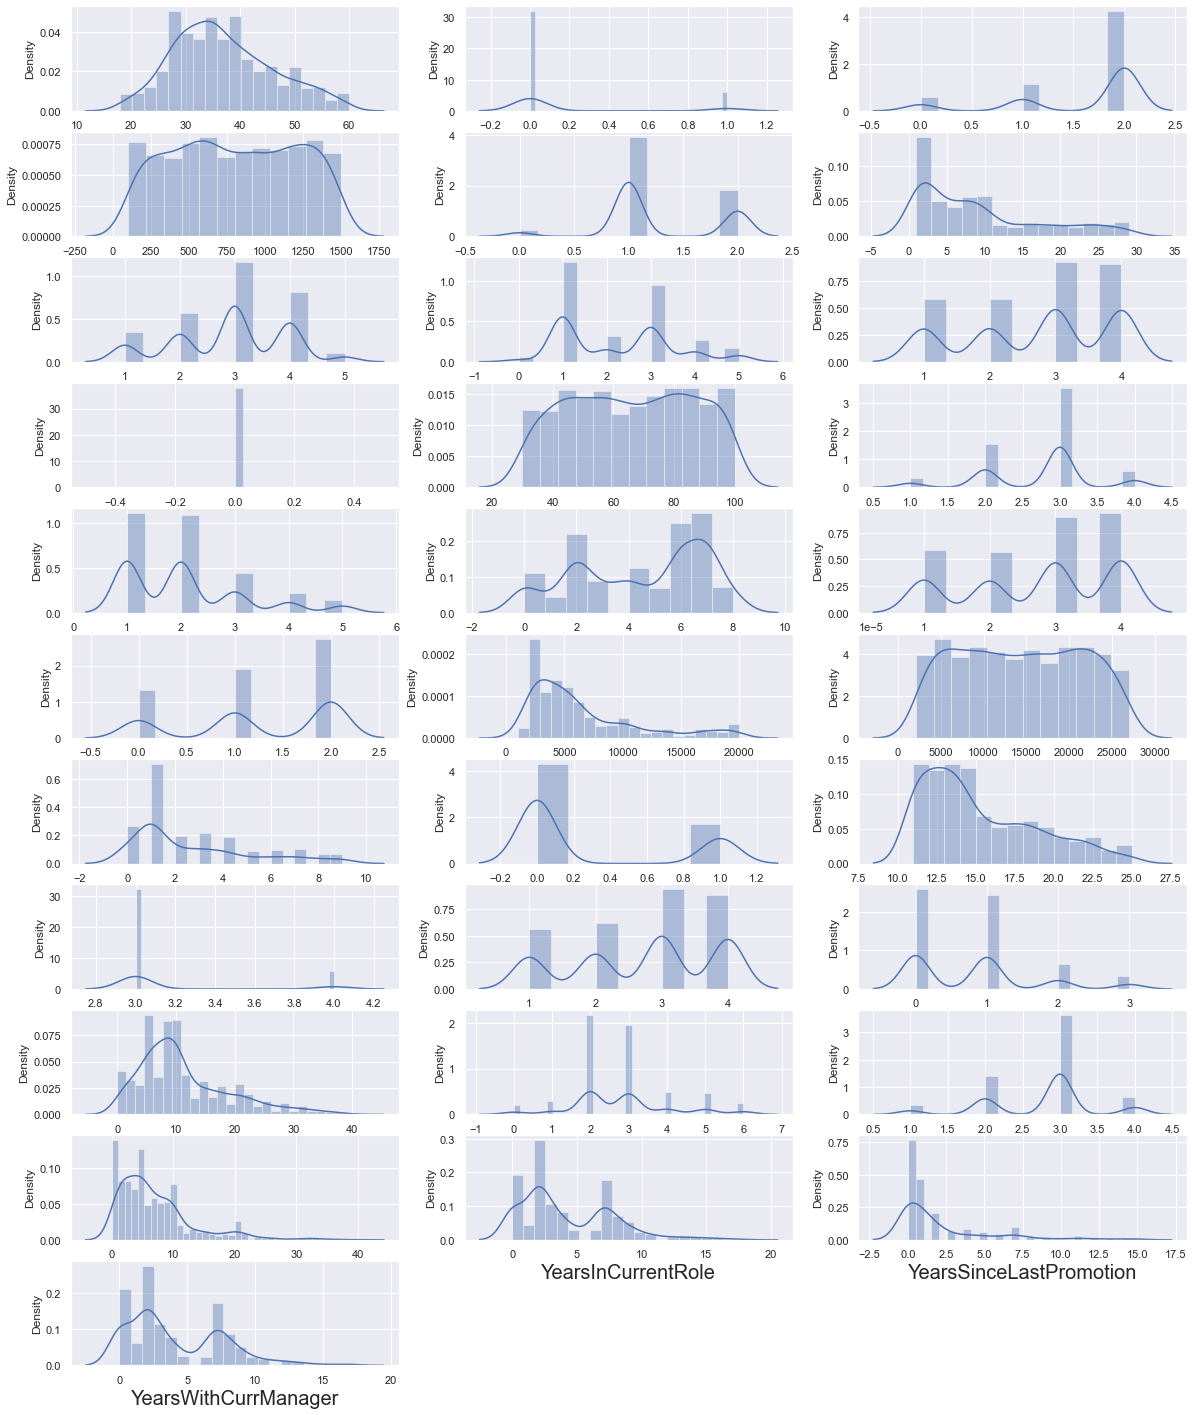

In [14]:
#Lets see how data is distributed for every column
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=31:               #As there are 31 columns in the data
        ax= plt.subplot(11,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

In [ ]:
#We see most of the columns are categorical data

In [15]:
X = data.drop(columns=['Attrition'])
y = data['Attrition']

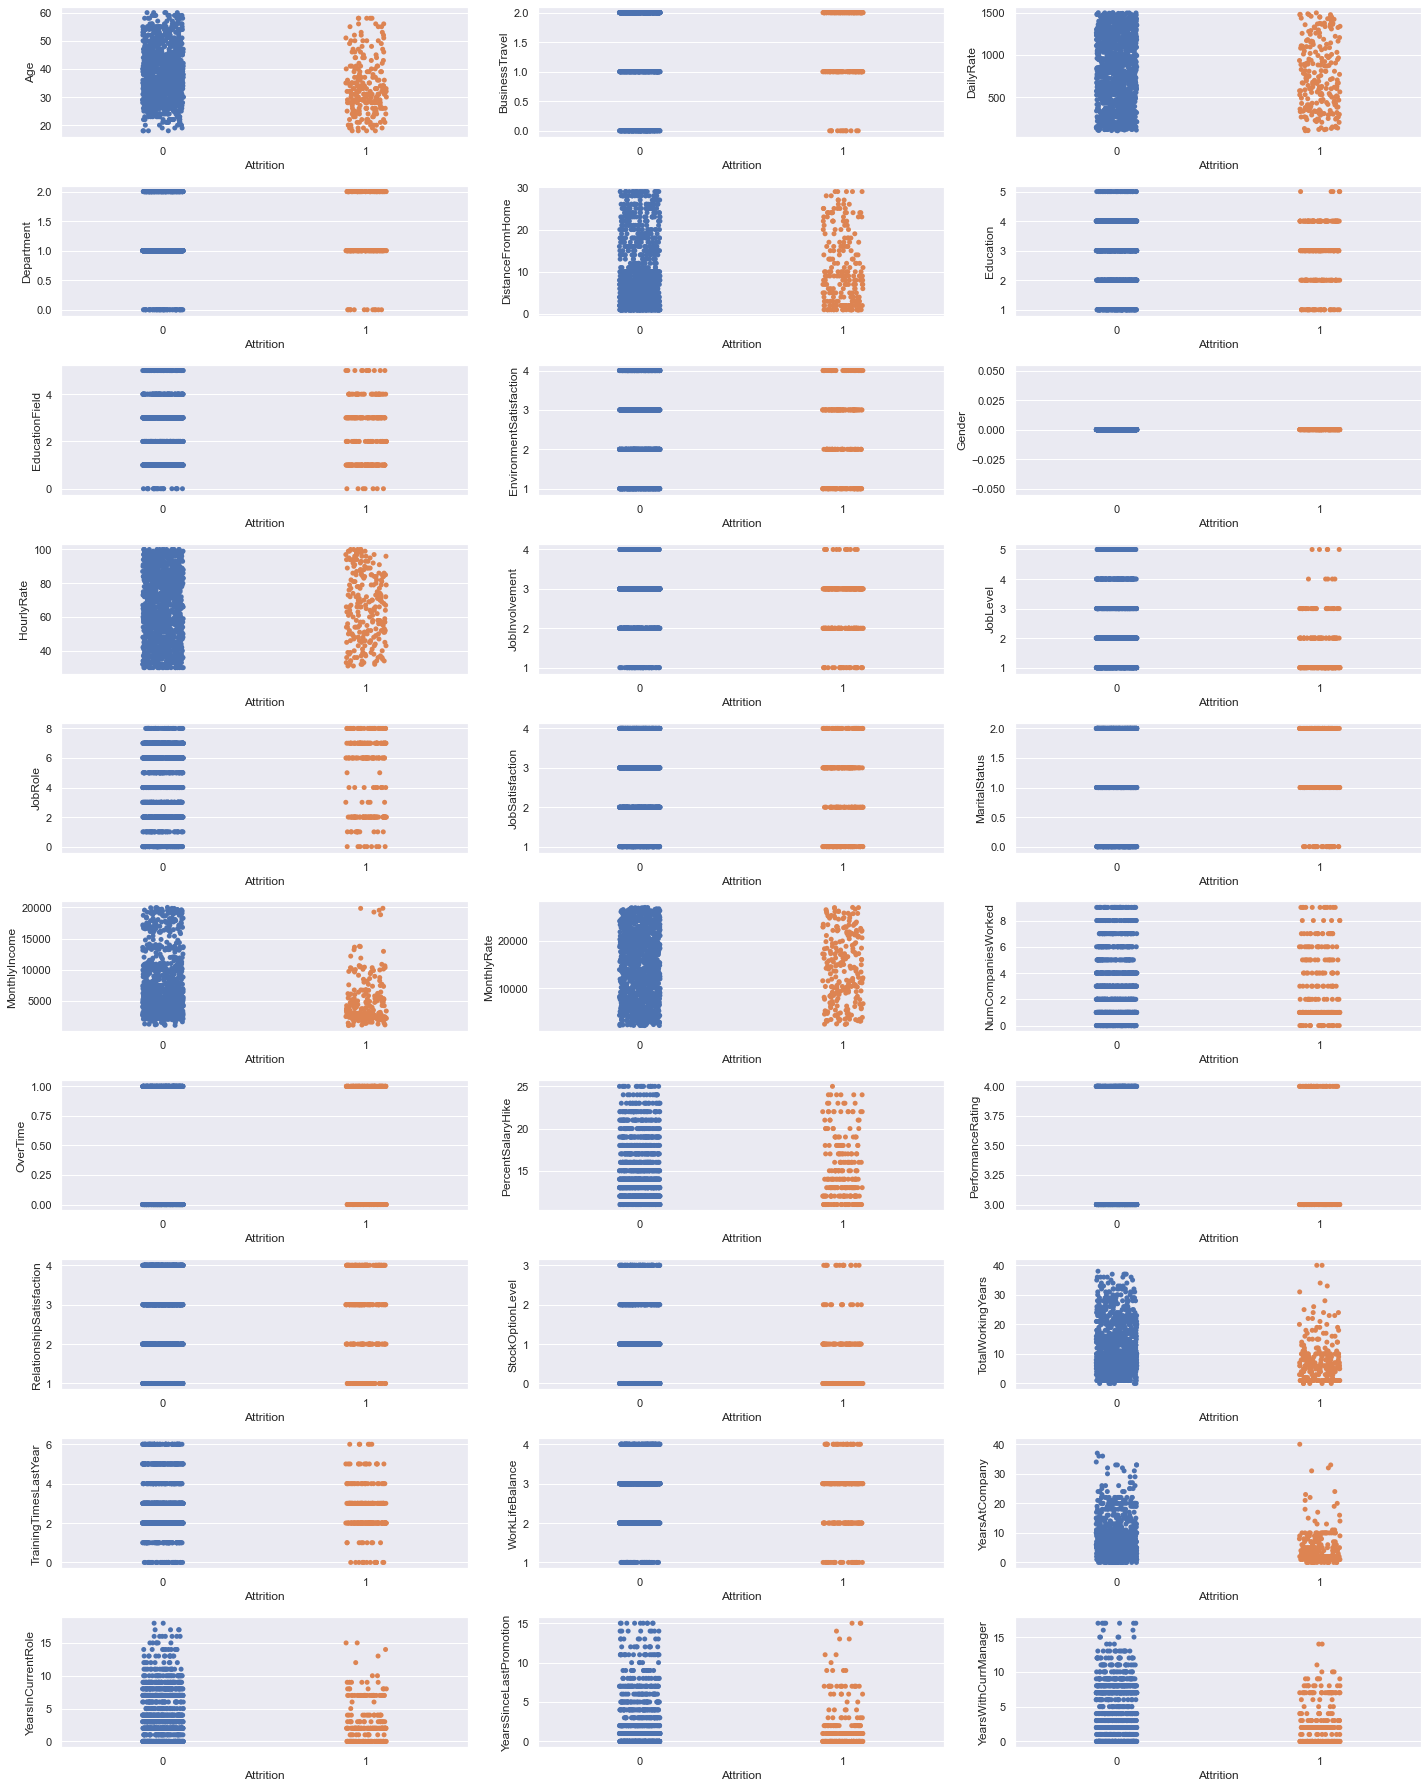

In [16]:
#Lets see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=30:
        ax =plt.subplot(10,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [ ]:
#Lets check the multicollinearity on dependent variables. Before that we should scale our data.

In [17]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#Lets check the values
vif

,vif,Features
0,2.055511,Age
1,1.019318,BusinessTravel
2,1.020188,DailyRate
3,1.941377,Department
4,1.017508,DistanceFromHome
5,1.061269,Education
6,1.016822,EducationField
7,1.018528,EnvironmentSatisfaction
8,NaN,Gender
9,1.021749,HourlyRate


In [ ]:
#only few vif values are around 10 and others are less than 5. So there is no multicollinearity

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.25, random_state=355)

In [20]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#Lets see how well our model performs on the test dataset

In [21]:
y_pred = log_reg.predict(x_test)

In [22]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8668478260869565

### Confusion matrix

In [23]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[301,   6],
       [ 43,  18]], dtype=int64)

In [24]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [25]:
Accuracy = (true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
Accuracy

0.8668478260869565

In [26]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9804560260586319

In [27]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.875

In [28]:
#F1 score
F1_score = 2*(Recall*Precision)/(Recall+Precision)
F1_score

0.9247311827956989

In [29]:
#Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.6377689966358733

# Using KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
#Lets fit the data into Knn model and see how well it performs
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [32]:
y_pred = knn.predict(x_test)

In [33]:
knn.score(x_train,y_train)

0.8774954627949183

In [34]:
print("The accuracy score is : ",accuracy_score(y_test,y_pred))

The accuracy score is :  0.8369565217391305


### lets try to increase accuracy by using hyperparameter tuning

In [35]:
param_grid = {'algorithm' : ['ball_tree','kd_tree','brute'],
              'leaf_size' : [18,20,25,27,30,32,34],
              'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [37]:
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [38]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.855, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.842, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.855, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.832, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.864, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.855, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.851, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.850, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.850, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.850, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.860, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.851, total= 

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:   31.1s finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [39]:
#Lets see the best parameters according to gridsearch
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 5}

In [40]:
#we will use these parameters in our knn algorithm and check if accuracy is increasing
knn = KNeighborsClassifier(algorithm = 'ball_tree',leaf_size = 18, n_neighbors = 5)

In [41]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18)

In [42]:
knn.score(x_train,y_train)

0.8774954627949183

In [43]:
knn.score(x_test,y_test)

0.8369565217391305

# So the KNN model without hyper parameter tuning also has produced the best model.

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rand_clf = RandomForestClassifier(random_state=355)

In [47]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=355)

In [48]:
rand_clf.score(x_test,y_test)

0.8559782608695652

In [49]:
#hyper parameter tuning to improve the score
grid_param = {'n_estimators' : [90,100,115,130],
              'criterion' : ['gini','entropy'],
              'min_samples_leaf' : range(1,10,1),
              'min_samples_split' : range(2,10,1),
              'max_features' : ['auto','log2']
              }

In [50]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs=-1,verbose = 3)

In [51]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 17.5min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=355),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [90, 100, 115, 130]},
             verbose=3)

In [52]:
grid_search.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 115}

In [53]:
rand_clf = RandomForestClassifier(criterion='gini',
                                 max_features = 'auto',
                                 min_samples_leaf= 1,
                                 min_samples_split=6,
                                 n_estimators= 115, random_state=41)

In [54]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=6, n_estimators=115, random_state=41)

In [55]:
rand_clf.score(x_test,y_test)

0.8532608695652174

In [ ]:
# So using random forest, we have recieved the best score. So we will save this model

In [56]:
import pickle
HR_Analytics = 'finalized_model.pickle'
pickle.dump(rand_clf,open(HR_Analytics,'wb'))

# Saved the model